## What is Pytorch?

* it's a numpy inspired library created to use with GPU
* it's highly flexible and fast

In [2]:
from __future__ import print_function
import torch

x = torch.empty(5, 3)
print(x)

tensor([[ 0.0000e+00,  3.6893e+19, -2.4205e-07],
        [ 2.5250e-29,  1.1210e-44, -0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 1.4013e-45,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])


In [3]:
x = torch.rand(5,3)
print(x)

tensor([[0.9678, 0.1984, 0.7122],
        [0.3652, 0.1345, 0.1811],
        [0.3488, 0.3147, 0.8327],
        [0.0707, 0.3943, 0.0057],
        [0.6515, 0.6350, 0.9523]])


In [11]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [6]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [13]:
# create a tensopr baed on exitsting tensor
x = x.new_ones(5,3, dtype=torch.double)
print(x)

x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.2380, -0.3409, -0.7879],
        [ 1.4530, -0.0624, -0.6508],
        [ 0.1394, -1.6596, -0.3669],
        [ 0.1116,  0.0830,  0.4919],
        [-0.2723, -0.2591, -1.8662]])


In [14]:
print(x.size())

torch.Size([5, 3])


In [16]:
# addition
y = torch.rand(5, 3)
print(x + y)
print(torch.add(x, y))
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)
y.add_(x)
print(y)

tensor([[ 0.8399,  0.1450, -0.1267],
        [ 1.8542,  0.2760, -0.2828],
        [ 0.8370, -1.6457,  0.5077],
        [ 0.9149,  0.6015,  0.8426],
        [ 0.5916,  0.2547, -1.4928]])
tensor([[ 0.8399,  0.1450, -0.1267],
        [ 1.8542,  0.2760, -0.2828],
        [ 0.8370, -1.6457,  0.5077],
        [ 0.9149,  0.6015,  0.8426],
        [ 0.5916,  0.2547, -1.4928]])
tensor([[ 0.8399,  0.1450, -0.1267],
        [ 1.8542,  0.2760, -0.2828],
        [ 0.8370, -1.6457,  0.5077],
        [ 0.9149,  0.6015,  0.8426],
        [ 0.5916,  0.2547, -1.4928]])
tensor([[ 0.8399,  0.1450, -0.1267],
        [ 1.8542,  0.2760, -0.2828],
        [ 0.8370, -1.6457,  0.5077],
        [ 0.9149,  0.6015,  0.8426],
        [ 0.5916,  0.2547, -1.4928]])


In [18]:
print(x[:, 1])

tensor([-0.3409, -0.0624, -1.6596,  0.0830, -0.2591])


In [19]:
# resizing/reshaping the tensor
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1, 8)# -1 means the size is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [21]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.8140])
0.8140251040458679


In [28]:
#converting to numpy
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

# converting numpy array to torch tensor
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a, b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
[2. 2. 2. 2. 2.] tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [27]:
a.add_(1)
print(a,b)

tensor([2., 2., 2., 2., 2.]) [2. 2. 2. 2. 2.]


In [29]:
# CUDA tensors
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device) # directly create tensor on GPU
    x = x.to(device)
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))

## Autograd

In [31]:
x = torch.ones(2, 2, requires_grad=True)

# tensor operation
y = x + 2

print(y.grad_fn)

z = y*y*3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [38]:
a = torch.randn(2,2)
a = ((a * 3 / (a - 1)))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [40]:
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [42]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y *2

print(y)

tensor([-288.6315,  441.8189,  891.4483], grad_fn=<MulBackward0>)


In [56]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


In [57]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


## Neural Network

In [65]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 *6 *6, 120) # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a sqwuare you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)
        
        
        
        
        

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [66]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [67]:
input = torch.randn(1,1,32,32)
print(input.size())
out = net(input)
print(out)

torch.Size([1, 1, 32, 32])
tensor([[-0.1222, -0.0091, -0.0161, -0.0355,  0.1157, -0.0539, -0.0415,  0.0884,
         -0.0051,  0.1320]], grad_fn=<AddmmBackward>)


In [68]:
net.zero_grad()
out.backward(torch.randn(1,10))

## Loss Function

In [69]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.7953, grad_fn=<MseLossBackward>)


In [76]:
print(loss.grad_fn) # MSEloss
print(loss.grad_fn.next_functions[0][0]) # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # Linear

In [77]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0087, -0.0094,  0.0057, -0.0058,  0.0156, -0.0015])


## Updating the weights

In [79]:
# Stochastic Gradient Descent
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [80]:
import torch.optim as optim

# creating an optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad() # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # does the update

## Training a classifier

In [82]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


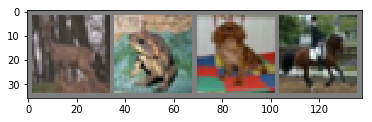

 deer  frog   dog horse


In [85]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Defining a Conv Net

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5)